# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [6]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
#cheking the data types
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


no null values.

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

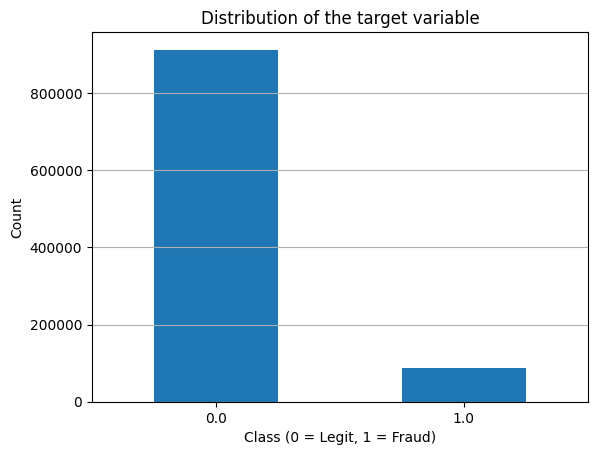

In [ ]:
# 1.Distribution of the target variable
fraud['fraud'].value_counts().plot(kind='bar',title='Distribution of the target variable')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Yes, our data set is imbalanced 

In [12]:
#2.Train a logistic regression model and 3.evaluate its performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

features = fraud.drop('fraud', axis=1)
target = fraud['fraud']

X_train, X_test, y_train, y_test = train_test_split(
                                        features, target, 
                                        test_size=0.2, 
                                        random_state=42)

model = LogisticRegression(
            max_iter = 1000, 
            class_weight = 'balanced',
            random_state=42)

model.fit(X_train, y_train)
model.predict(X_test)
print('Confusion Matrix;')
print(confusion_matrix(y_test, model.predict(X_test)))

print('---------------')

print('Classification Report;')
print(classification_report(y_test, model.predict(X_test),digits=4))


Confusion Matrix;
[[170350  12207]
 [   849  16594]]
---------------
Classification Report;
              precision    recall  f1-score   support

         0.0     0.9950    0.9331    0.9631    182557
         1.0     0.5762    0.9513    0.7177     17443

    accuracy                         0.9347    200000
   macro avg     0.7856    0.9422    0.8404    200000
weighted avg     0.9585    0.9347    0.9417    200000



In [15]:
#4.Run oversampling techniques. 
from imblearn.over_sampling import RandomOverSampler, SMOTE

ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train,y_train)

#Checking the distribution of the target variable after oversampling
print('Before oversampling:',y_train.value_counts())
print('After oversampling:',y_train_over.value_counts())

#Train a logistic regression model with the resampled data 
model_oversampled = LogisticRegression(
            max_iter = 1000,
            random_state=42
            )

model_oversampled.fit(X_train_over,y_train_over)
y_pred_over = model_oversampled.predict(X_test)

print('Confusion Matrix after oversampling:')
print(confusion_matrix(y_test, y_pred_over))
print('---------------')
print('Classification Report after oversampling:')
print(classification_report(y_test, y_pred_over, digits=4))


Before oversampling: fraud
0.0    730040
1.0     69960
Name: count, dtype: int64
After oversampling: fraud
0.0    730040
1.0    730040
Name: count, dtype: int64
Confusion Matrix after oversampling:
[[170345  12212]
 [   852  16591]]
---------------
Classification Report after oversampling:
              precision    recall  f1-score   support

         0.0     0.9950    0.9331    0.9631    182557
         1.0     0.5760    0.9512    0.7175     17443

    accuracy                         0.9347    200000
   macro avg     0.7855    0.9421    0.8403    200000
weighted avg     0.9585    0.9347    0.9417    200000



In [16]:
#5 Run undersampling techniques. 

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print('Before undersampling:', y_train.value_counts())
print('After undersampling:', y_train_under.value_counts())

#Train a logistic regression model with the resampled data
model_undersampled = LogisticRegression(
            max_iter = 1000,
            random_state=42
            )

model_undersampled.fit(X_train_under, y_train_under)
y_pred_under = model_undersampled.predict(X_test)
print('Confusion Matrix after undersampling:')
print(confusion_matrix(y_test, y_pred_under))
print('---------------')
print('Classification Report after undersampling:')
print(classification_report(y_test, y_pred_under, digits=4))


Before undersampling: fraud
0.0    730040
1.0     69960
Name: count, dtype: int64
After undersampling: fraud
0.0    69960
1.0    69960
Name: count, dtype: int64
Confusion Matrix after undersampling:
[[170299  12258]
 [   841  16602]]
---------------
Classification Report after undersampling:
              precision    recall  f1-score   support

         0.0     0.9951    0.9329    0.9630    182557
         1.0     0.5753    0.9518    0.7171     17443

    accuracy                         0.9345    200000
   macro avg     0.7852    0.9423    0.8400    200000
weighted avg     0.9585    0.9345    0.9415    200000



In [ ]:
#6 run smote technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Before SMOTE:', y_train.value_counts())
print('After SMOTE:', y_train_smote.value_counts())


Before SMOTE: fraud
0.0    730040
1.0     69960
Name: count, dtype: int64
After SMOTE: fraud
0.0    730040
1.0    730040
Name: count, dtype: int64


In [18]:
lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = lr_smote.predict(X_test)
print("Confusion Matrix (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote, digits=4))



Confusion Matrix (SMOTE):
[[170446  12111]
 [   872  16571]]

Classification Report (SMOTE):
              precision    recall  f1-score   support

         0.0     0.9949    0.9337    0.9633    182557
         1.0     0.5777    0.9500    0.7185     17443

    accuracy                         0.9351    200000
   macro avg     0.7863    0.9418    0.8409    200000
weighted avg     0.9585    0.9351    0.9420    200000



In [20]:
#Compare the results of the three techniques
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

def get_metrics(name, y_true, y_pred):
    return {
        'Model': name,
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

results = []

# Modelo original
y_pred_original = model.predict(X_test)
results.append(get_metrics('Original (weighted)', y_test, y_pred_original))

# Oversampled
results.append(get_metrics('Oversampled', y_test, y_pred_over))

# Undersampled
results.append(get_metrics('Undersampled', y_test, y_pred_under))

# SMOTE
results.append(get_metrics('SMOTE', y_test, y_pred_smote))

# Crear dataframe de comparación
comparison_df = pd.DataFrame(results)
print(comparison_df.sort_values(by='F1-Score', ascending=False))


                 Model  Precision    Recall  F1-Score
3                SMOTE   0.577749  0.950009  0.718526
0  Original (weighted)   0.576161  0.951327  0.717671
1          Oversampled   0.576016  0.951155  0.717511
2         Undersampled   0.575260  0.951786  0.717103


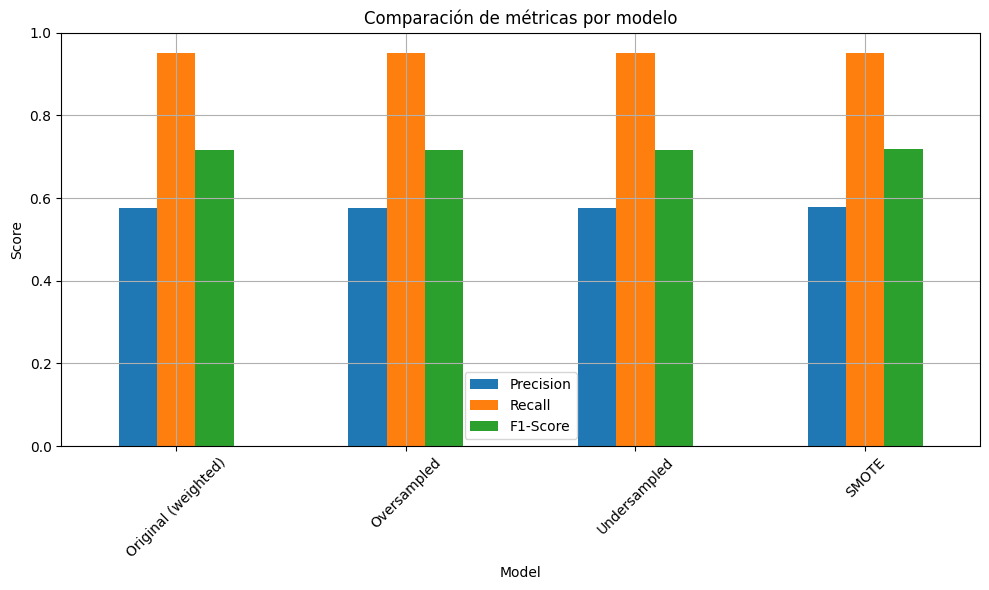

Tras comparar cuatro enfoques de entrenamiento en un problema de clasificación binaria con datos desbalanceados, se observó que todas las técnicas (original con pesos, oversampling, undersampling y SMOTE) alcanzan métricas similares.

La técnica SMOTE logró el mejor F1-score (0.7185), superando ligeramente al modelo original con pesos balanceados.

Todas las configuraciones ofrecieron un recall superior al 95%, lo cual es fundamental en un contexto de fraude, donde minimizar los falsos negativos es prioritario.

No obstante, el precision (~57%) indica que el modelo genera una cantidad considerable de falsos positivos, lo cual podría ser abordado en futuras iteraciones mediante:

Modelos más complejos (árboles, XGBoost, etc.).

Ingeniería de features.

Umbral de decisión personalizado.